In [73]:
# Stable Diffusion 1.4 t2i pose adapter
pose_adapter_path = "TencentARC/t2iadapter_keypose_sd14v1"


An error occurred while trying to fetch TencentARC/t2iadapter_keypose_sd14v1: TencentARC/t2iadapter_keypose_sd14v1 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


(512, 512)


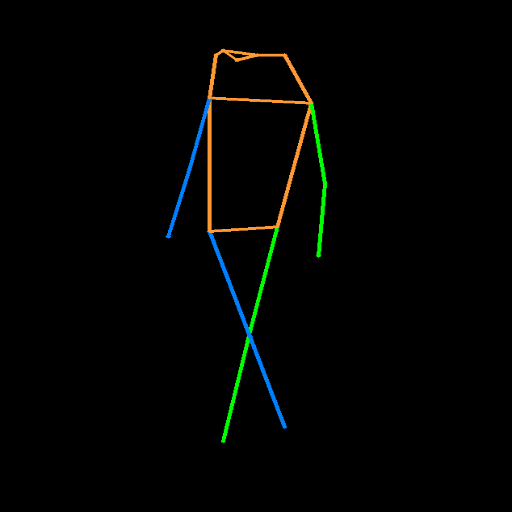

In [74]:
from diffusers import T2IAdapter, StableDiffusionAdapterPipeline
from diffusers.utils import load_image

adapter = T2IAdapter.from_pretrained(pose_adapter_path)
adapter = adapter.to(torch.float16)
pose_image = load_image(
    "https://huggingface.co/datasets/diffusers/docs-images/resolve/main/t2i-adapter/keypose_sample_input.png"
)
cond = pose_image
print(cond.size)
prompt = ["a photo of a man"]
cond

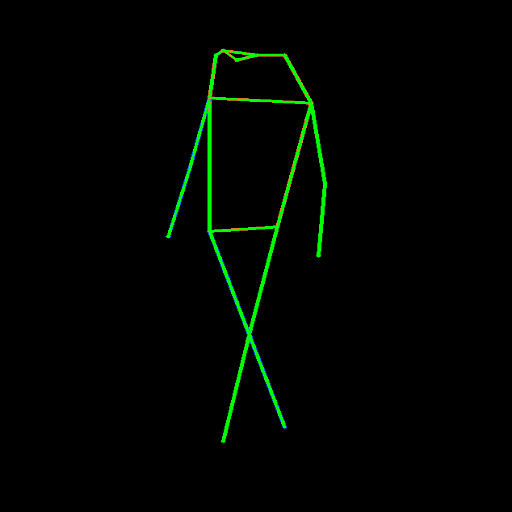

In [75]:
import numpy as np
from PIL import Image

cond = Image.open("cond_green.png")
cond = Image.fromarray(np.array(cond)[:, :, :3])
cond

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

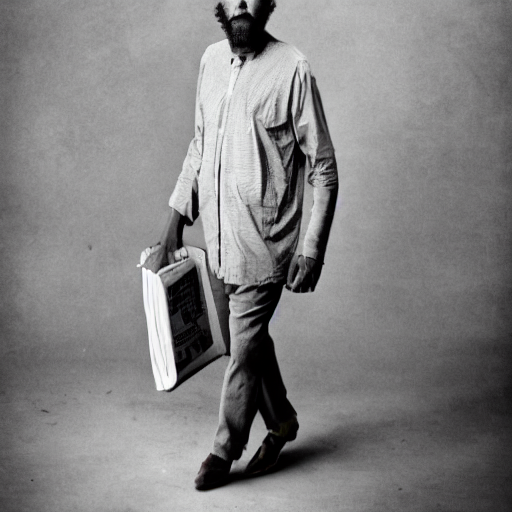

In [77]:
import torch

pipeline = StableDiffusionAdapterPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16,
    adapter=adapter,
).to("cuda")

image = pipeline(prompt, cond, adapter_conditioning_scale=1).images[0]
image